# Music Forecaster
Prince Javier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Wav File

In [2]:
from scipy.io import wavfile
fs, data = wavfile.read('canon.wav')

/Users/prince.javier/opt/anaconda3/envs/colorizer/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
# the wav file has 4 beats per second
fs # sampling rate - samples per second
fs_beat = fs/4 # samples per beat
fs, fs_beat

(44100, 11025.0)

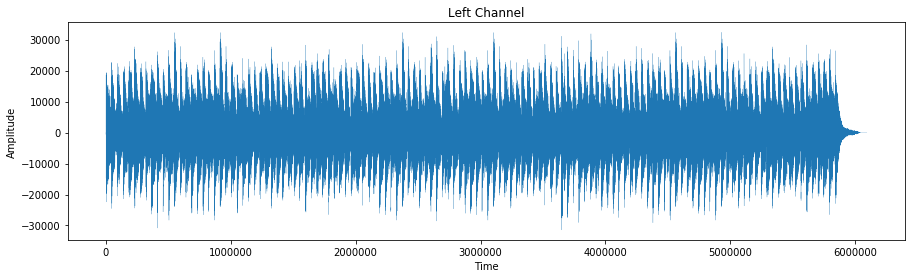

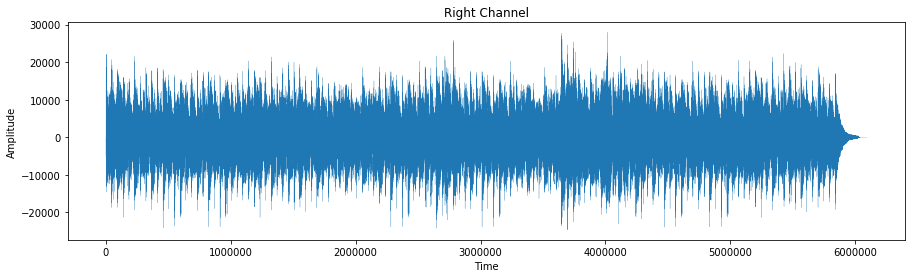

In [4]:
plt.figure(figsize=(15, 4))
# left channel
plt.plot(data[:, 0], linewidth=0.2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Left Channel")
plt.show()

# right channel
plt.figure(figsize=(15, 4))
plt.plot(data[:, 1], linewidth=0.2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Right Channel")
plt.show()

Text(0, 0.5, 'Amplitude')

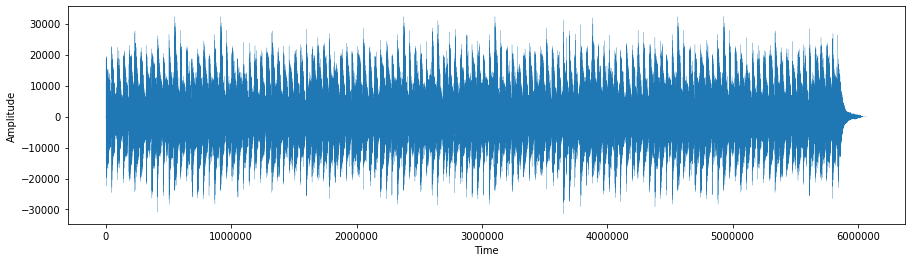

In [5]:
# we get one channel
wav = data[:, 0]
wav = np.trim_zeros(wav)
plt.figure(figsize=(15, 4))
plt.plot(wav, linewidth=0.2)
plt.xlabel("Time")
plt.ylabel("Amplitude")

## Split Wav Data into Distinct Elements

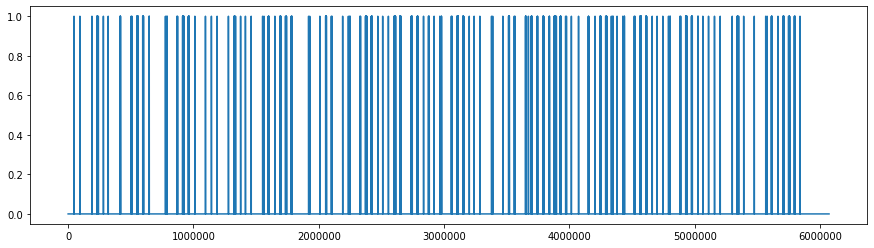

In [6]:
plt.figure(figsize=(15, 4))
wav2 = np.trim_zeros(wav)
wav2 = [1 if w > 2.2e4 else 0 for w in wav2]
plt.plot(wav2)

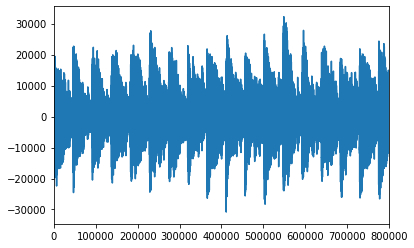

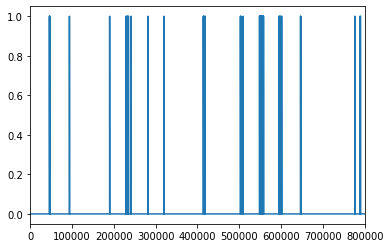

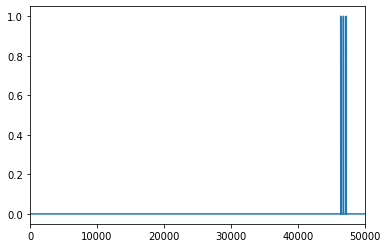

In [7]:
plt.plot(wav)
plt.xlim(0, 800000)
plt.show()
plt.plot(wav2)
plt.xlim(0, 800000)
plt.show()
plt.plot(wav2)
plt.xlim(0, 50000)
plt.show()

In [8]:
# we check the frequency of gaps
gaps = []
gap = 0
for i in range(len(wav2) - 1):
    if wav2[i] == 0 and wav2[i] == wav2[i + 1]:
        gap += 1
    else:
        gaps.append(gap)
        gap = 0

gaps = [g for g in gaps if g > 5000 and g < 15000]
gaps = [np.round(g, -2) for g in gaps]
gaps

[6000,
 5200,
 11900,
 5200,
 6000,
 11200,
 9300,
 5900,
 11900,
 5200,
 5800,
 11900,
 5200,
 9300,
 5800,
 5400,
 6700,
 5800,
 11900,
 11900,
 5200,
 11900,
 5200,
 6000,
 11200]

In [9]:
from collections import Counter
Counter(gaps).most_common(5)

[(5200, 6), (11900, 6), (6000, 3), (5800, 3), (11200, 2)]

In [10]:
np.mean([45600, 38900, 45200, 38900, 37400])

41200.0

(array([10.,  4.,  1.,  0.,  0.,  0.,  2.,  0.,  2.,  6.]),
 array([ 5200.,  5870.,  6540.,  7210.,  7880.,  8550.,  9220.,  9890.,
        10560., 11230., 11900.]),
 <a list of 10 Patch objects>)

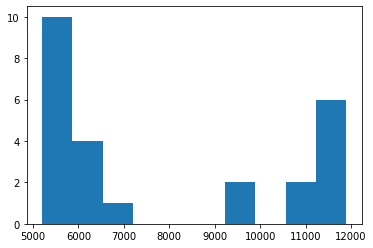

In [11]:
plt.hist(gaps)

In [12]:
# we split every beat
beat = 45600//4  
up_to = int(len(wav) / beat) * beat
wav_for_split = wav[:up_to]
wav_split = np.split(wav_for_split, len(wav_for_split) / beat)

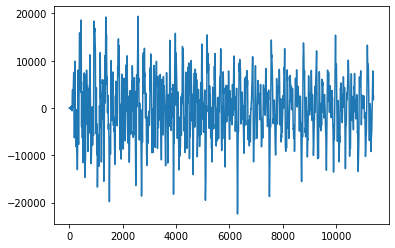

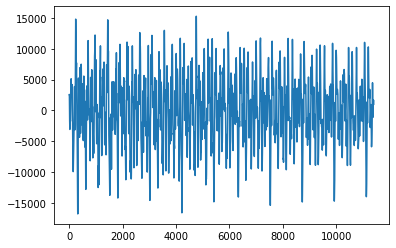

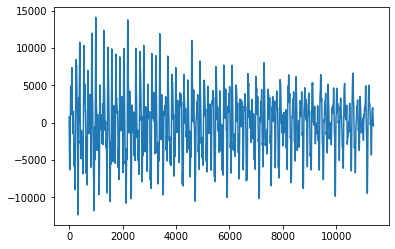

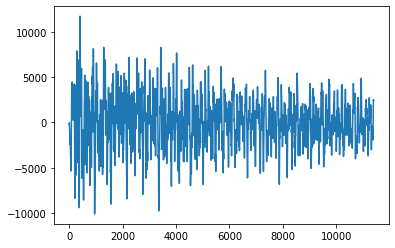

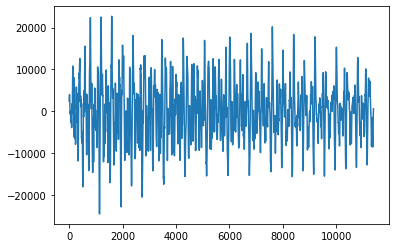

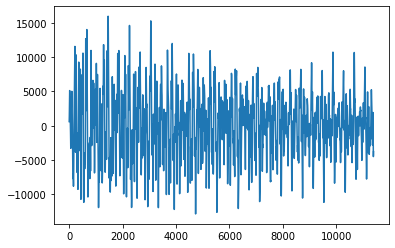

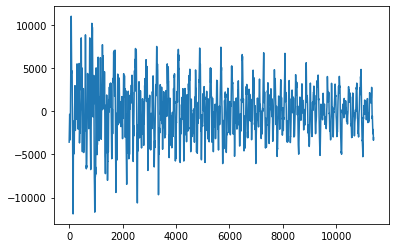

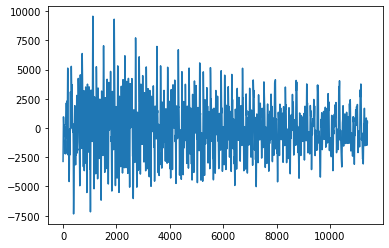

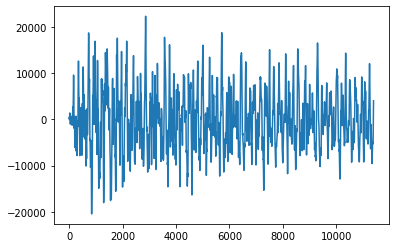

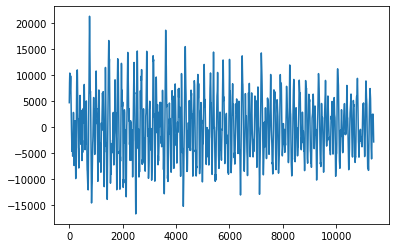

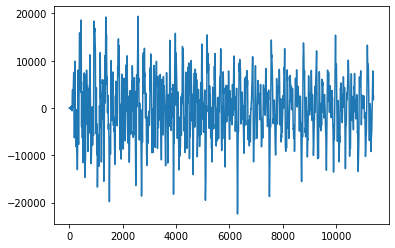

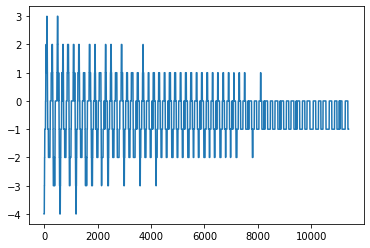

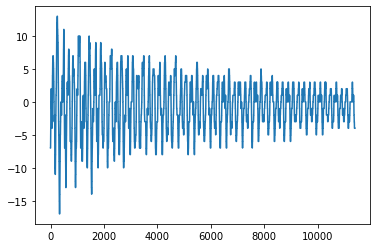

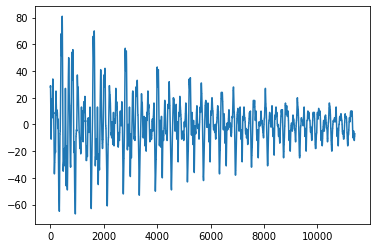

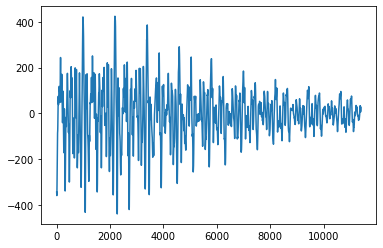

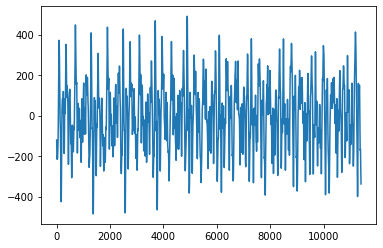

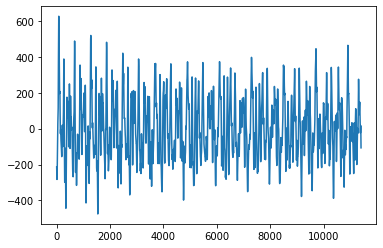

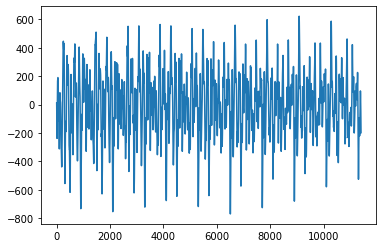

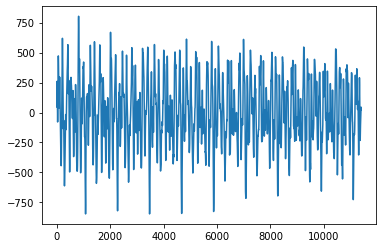

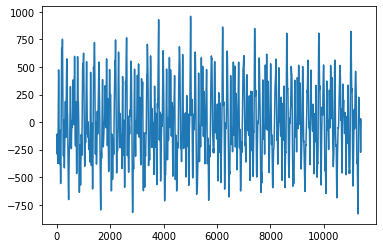

In [13]:
for i in range(10):
    plt.plot(wav_split[i])
    plt.show()
    
for i in range(10):
    plt.plot(wav_split[-i])
    plt.show()

## Find Notes In each Element Using Fourier Transform

<p style="text-align: center;">Fourier Transform</p>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png">

In [14]:
# We get the notes in each beat
# Let's use Fourier transform

from numpy.fft import fft
import math

def get_freqs(wav, threshold = 400, plot=False, num_notes=3):

    n = len(wav)
    p = fft(wav)


    mag = np.sqrt(p.real**2 + p.imag**2)
    mag = mag * 2 / n
    mag = mag[0:math.ceil(n/2.0)]

    freq = np.arange(0, len(mag), 1) * (fs / n)

    if threshold != 0:
        top_mags = mag[np.in1d(mag, mag[mag>threshold])]
        top_freqs = np.rint(freq[np.in1d(mag, mag[mag>threshold])])
        
        inds = np.argsort(top_mags)[::-1]
        top_mags = top_mags[inds]
        top_freqs = top_freqs[inds]
        
        mag[mag<threshold] = threshold

        
    if plot:
        
        plt.plot(freq/1000, mag)
        plt.xticks(np.arange(min(freq/1000), max(freq/1000)+1, 1))
        plt.xlim(0, 1)
        plt.show()
        
    return top_freqs[:num_notes], top_mags[:num_notes]

In [15]:
i = 0
freqs0 = []
mags = []
num_notes = 5

for i in range(len(wav_split)):
    freq_, mag = get_freqs(wav_split[i], threshold=500, plot=False, num_notes=num_notes)
    if len(freq_) >= num_notes:
        freqs0.append(freq_)
    mags.append(mag)
    
freqs0 = np.array(freqs0)

In [16]:
freqs0[:5], mags[:5]

(array([[ 186.,  441.,  294.,  220.,  371.],
        [ 294.,  441.,  882.,  186.,  371.],
        [ 294.,  588.,  186.,  441.,  371.],
        [ 294., 1485.,  743.,  186.,  739.],
        [ 220.,  329.,  441.,  553.,  279.]]),
 [array([4004.84616986, 3123.92958714, 2228.41694041, 2213.79175411,
         1940.89541175]),
  array([4344.56225205, 3068.38206043, 2704.02572584, 2521.97635275,
         1625.65269343]),
  array([3526.22905739, 1937.81467657, 1540.35178405, 1262.38785722,
         1211.850769  ]),
  array([2046.53005749, 1248.10512532, 1113.40975467,  985.64079356,
          883.56668419]),
  array([4162.43708365, 4132.5029195 , 3591.40752085, 2669.08036775,
         2258.31195945])])

## Convert Into a "Music Sheet"

In [17]:
# flatten
music_sheet = []
for i in range(num_notes):
    sheet = []
    sheet += list(freqs0[:, i])
    music_sheet.append(sheet)
    
music_sheet0 = np.array(music_sheet)
music_sheet0.shape

(5, 516)

In [18]:
# # unique notes
# # round to 10s
# music_sheet = [np.round(i, 1) for i in music_sheet]
# set(music_sheet)
music_sheet0 = np.round(music_sheet, -1)

In [19]:
# c1 d e f# g a b c# d e f# g a b c# d a b-> 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
notes = {
    1:186,
    2:200,
    3:220,
    4:250,
    5:280,
    6: 290,
    7: 330,
    8: 370,
    9: 390,
    10: 440,
    11: 500,
    12: 550,
    13: 590,
    14: 880,
    15: 990
}

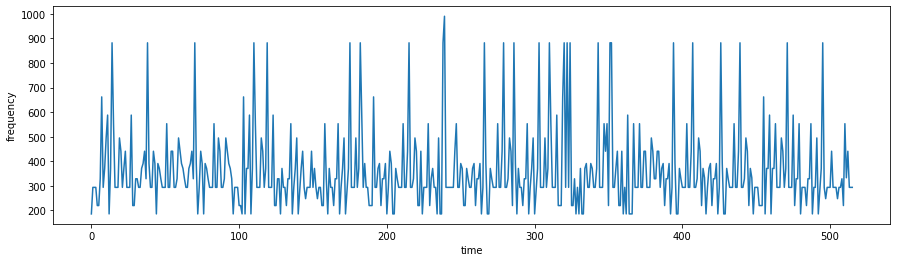

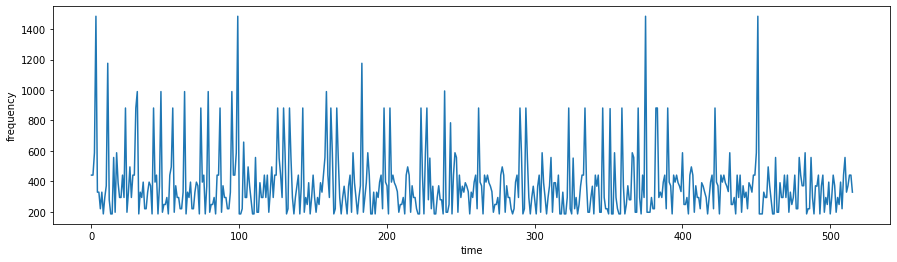

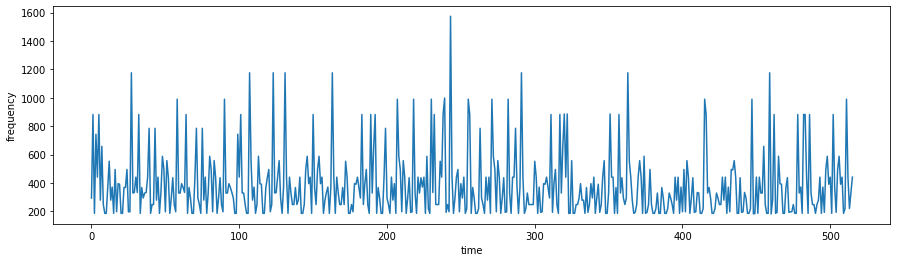

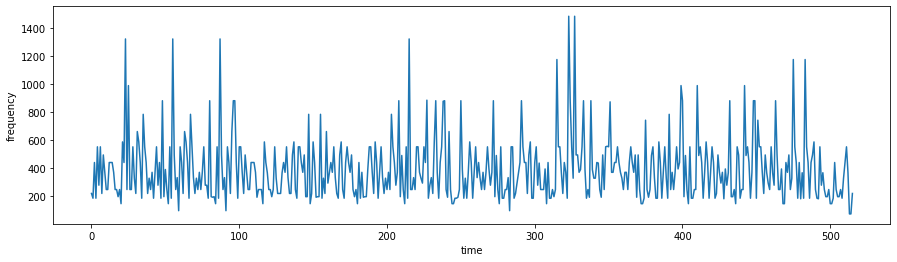

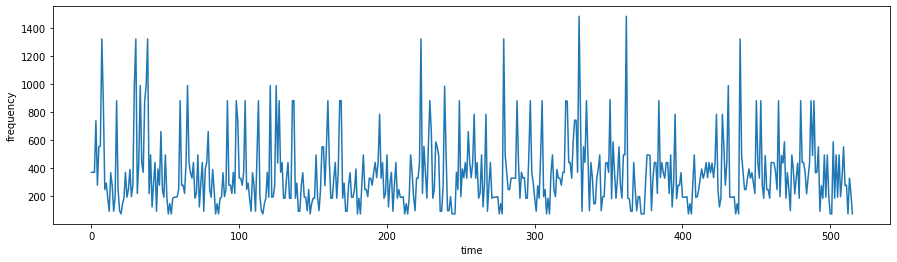

In [24]:
for i in range(num_notes):
    plt.figure(figsize=(15, 4))
    plt.plot(music_sheet[i])
    plt.xlabel('time')
    plt.ylabel('frequency')

In [26]:
import numpy as np
from scipy.io import wavfile

comb_wavs = []
sampleRate = fs
length = 1

for j in range(num_notes):
    music_wavs = []
    for i in range(len(music_sheet[j])):
        frequency = music_sheet[j][i]

        t = np.linspace(0, length, sampleRate*length+1)  #  Produces a 1 second Audio-File
        y = np.sin(frequency * 2 * np.pi * t)[:len(t)//3]  #  Has frequency

        music_wavs += list(y)
    print(len(music_wavs))
    music_wavs = np.array(music_wavs)
    comb_wavs.append(music_wavs)

comb_wavs = np.sum(comb_wavs, axis=0)
wavfile.write('Sine.wav', sampleRate, comb_wavs)

7585200
7585200
7585200
7585200
7585200


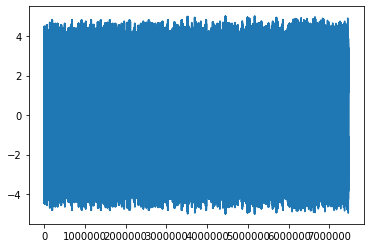

In [57]:
plt.plot(comb_wavs)

## Prepare for Training Model

In [27]:
music_sheet = pd.DataFrame(music_sheet0).T
music_sheet

0       1      2      3      4
0    190.0   440.0  290.0  220.0  370.0
1    290.0   440.0  880.0  190.0  370.0
2    290.0   590.0  190.0  440.0  370.0
3    290.0  1480.0  740.0  190.0  740.0
4    220.0   330.0  440.0  550.0  280.0
..     ...     ...    ...    ...    ...
511  330.0   330.0  990.0  550.0  280.0
512  440.0   370.0  440.0  370.0   70.0
513  290.0   440.0  220.0   70.0  330.0
514  290.0   440.0  330.0   70.0  220.0
515  290.0   330.0  440.0  220.0   70.0

[516 rows x 5 columns]

In [28]:
# convert series to supervised learning
## NOTE: Place target col at the very beginning

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, for_pred=False):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    names_include = []
    names_include += names
    if for_pred == False:
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names_include += ['var1(t)']
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names_include += ['var1(t+%s)' % i]
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop non-target columns
    agg = agg[names_include]

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [29]:
def reframe_for_lstm(dataset, n_in, n_out):

    # ensure all data is float
    dataset = dataset.astype('float32')
    # normalize features
    # we fit transform the entire dataset
    scaled = scaler_X.fit_transform(dataset)

    # frame as supervised learning
    reframed = series_to_supervised(scaled, n_in, n_out)
    # drop columns we don't want to predict

    return reframed

In [30]:
def split_train_test(reframed, prop_train=0.80):
    # split into train and test sets
    values = reframed.values
    n_train = int(len(reframed) * prop_train)
    train = values[:n_train, :]
    test = values[n_train:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-n_out], train[:, -n_out:]
    test_X, test_y = test[:, :-n_out], test[:, -n_out:]
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    return train_X, train_y, test_X, test_y

## Training Model

<img src="https://devblogs.nvidia.com/wp-content/uploads/2015/03/NLP-lstm.png" />

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop

In [35]:
## Model Definition
# design network
def define_model(train_X_shape, n_out):
    model = Sequential()
    model.add(LSTM(100, input_shape=(train_X_shape[1], train_X_shape[2]), return_sequences=True))
    model.add(LSTM(100, return_sequences=True, dropout=0.01, activation='relu'))
    model.add(LSTM(100, return_sequences=True, dropout=0.01, activation='relu'))
    model.add(LSTM(100, return_sequences=False, dropout=0.01, activation='sigmoid'))
    model.add(Dense(n_out))
    
#     opt = RMSprop(learning_rate=0.001, rho=0.9)
    
    model.compile(loss='mse', optimizer="adam")
    return model

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 1, 100)            59600     
_________________________________________________________________
lstm_13 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_3 (Dense)              (None, 24)                2424      
Total params: 303,224
Trainable params: 303,224
Non-trainable params: 0
_________________________________________________________________
Train on 356 samples, validate on 89 samples
Epoch 1/200
356/356 [==============================] - 11s 31ms/sampl

356/356 [==============================] - 1s 2ms/sample - loss: 0.0097 - val_loss: 0.0387
Epoch 148/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0098 - val_loss: 0.0396
Epoch 149/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0093 - val_loss: 0.0378
Epoch 150/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0091 - val_loss: 0.0391
Epoch 151/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0087 - val_loss: 0.0387
Epoch 152/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0085 - val_loss: 0.0387
Epoch 153/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0081 - val_loss: 0.0391
Epoch 154/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0079 - val_loss: 0.0401
Epoch 155/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0078 - val_loss: 0.0404
Epoch 156/200
356/356 [==============================] - 1s 2ms/sampl

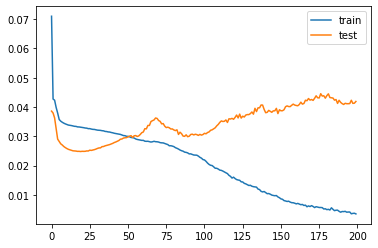

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 100)            59600     
_________________________________________________________________
lstm_17 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_18 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 24)                2424      
Total params: 303,224
Trainable params: 303,224
Non-trainable params: 0
_________________________________________________________________
Train on 356 samples, validate on 89 samples
Epoch 1/200
356/356 [==============================] - 10s 28ms/sampl

356/356 [==============================] - 1s 2ms/sample - loss: 0.0067 - val_loss: 0.0285
Epoch 148/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0066 - val_loss: 0.0284
Epoch 149/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0065 - val_loss: 0.0288
Epoch 150/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0061 - val_loss: 0.0286
Epoch 151/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0061 - val_loss: 0.0290
Epoch 152/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0063 - val_loss: 0.0287
Epoch 153/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0058 - val_loss: 0.0292
Epoch 154/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0058 - val_loss: 0.0286
Epoch 155/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0056 - val_loss: 0.0287
Epoch 156/200
356/356 [==============================] - 1s 2ms/sampl

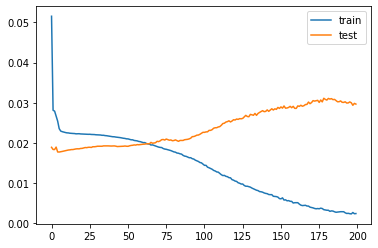

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 1, 100)            59600     
_________________________________________________________________
lstm_21 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_22 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_23 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 24)                2424      
Total params: 303,224
Trainable params: 303,224
Non-trainable params: 0
_________________________________________________________________
Train on 356 samples, validate on 89 samples
Epoch 1/200
356/356 [==============================] - 11s 31ms/sampl

356/356 [==============================] - 1s 3ms/sample - loss: 0.0034 - val_loss: 0.0348
Epoch 148/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0034 - val_loss: 0.0352
Epoch 149/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0035 - val_loss: 0.0350
Epoch 150/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0034 - val_loss: 0.0348
Epoch 151/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0034 - val_loss: 0.0346
Epoch 152/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0032 - val_loss: 0.0350
Epoch 153/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0031 - val_loss: 0.0349
Epoch 154/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0033 - val_loss: 0.0349
Epoch 155/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0034 - val_loss: 0.0348
Epoch 156/200
356/356 [==============================] - 1s 2ms/sampl

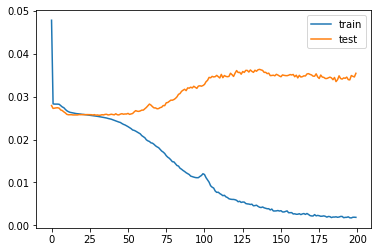

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 1, 100)            59600     
_________________________________________________________________
lstm_25 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_26 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_27 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 24)                2424      
Total params: 303,224
Trainable params: 303,224
Non-trainable params: 0
_________________________________________________________________
Train on 356 samples, validate on 89 samples
Epoch 1/200
356/356 [==============================] - 12s 33ms/sampl

356/356 [==============================] - 1s 3ms/sample - loss: 0.0040 - val_loss: 0.0354
Epoch 148/200
356/356 [==============================] - 1s 3ms/sample - loss: 0.0038 - val_loss: 0.0351
Epoch 149/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0039 - val_loss: 0.0350
Epoch 150/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0037 - val_loss: 0.0347
Epoch 151/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0037 - val_loss: 0.0355
Epoch 152/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0037 - val_loss: 0.0352
Epoch 153/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0036 - val_loss: 0.0356
Epoch 154/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0038 - val_loss: 0.0350
Epoch 155/200
356/356 [==============================] - 6s 17ms/sample - loss: 0.0036 - val_loss: 0.0352
Epoch 156/200
356/356 [==============================] - 7s 20ms/sam

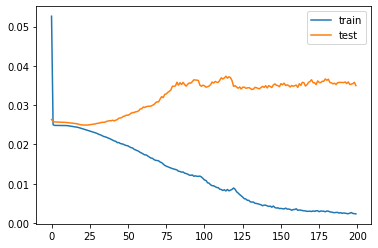

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 1, 100)            59600     
_________________________________________________________________
lstm_29 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_30 (LSTM)               (None, 1, 100)            80400     
_________________________________________________________________
lstm_31 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_7 (Dense)              (None, 24)                2424      
Total params: 303,224
Trainable params: 303,224
Non-trainable params: 0
_________________________________________________________________
Train on 356 samples, validate on 89 samples
Epoch 1/200
356/356 [==============================] - 11s 31ms/sampl

356/356 [==============================] - 1s 2ms/sample - loss: 0.0062 - val_loss: 0.0450
Epoch 148/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0061 - val_loss: 0.0449
Epoch 149/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0059 - val_loss: 0.0439
Epoch 150/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0058 - val_loss: 0.0452
Epoch 151/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0058 - val_loss: 0.0450
Epoch 152/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0057 - val_loss: 0.0451
Epoch 153/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0057 - val_loss: 0.0446
Epoch 154/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0053 - val_loss: 0.0453
Epoch 155/200
356/356 [==============================] - 1s 2ms/sample - loss: 0.0052 - val_loss: 0.0464
Epoch 156/200
356/356 [==============================] - 1s 2ms/sampl

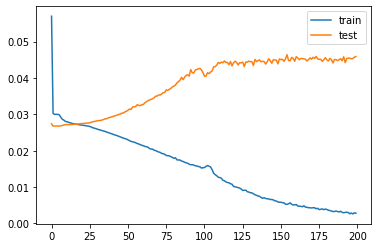

In [50]:
from tensorflow.keras.models import load_model

# fit network
for i in range(num_notes):
    # model 1
    n_in = 48
    n_out = 24
    # load dataset
    dataset = pd.DataFrame(music_sheet[i])
    

    # we fit this for target only
    scaler_y.fit_transform(dataset.values.reshape(-1, 1))
    reframed = reframe_for_lstm(dataset, n_in=n_in, n_out=n_out)
    train_X, train_y, test_X, test_y = split_train_test(reframed, prop_train=0.80)
    train_X.shape, train_y.shape, test_X.shape, test_y.shape
    
    model = define_model(train_X.shape, n_out)
#     model = load_model("music_forecaster_{i}.h5")
    model.summary()

    history = model.fit(train_X, train_y, epochs=200, batch_size=8, validation_data=(test_X, test_y), 
                        verbose=True, shuffle=False)

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    model.save("music_forecaster_{i}.h5")

## Predict

In [51]:
def get_X_for_pred(holdout_data_, calib_data_, target_name):
    holdout = holdout_data_.copy()
    holdout[target_name] = np.nan
    X_for_pred = pd.concat([calib_data_, holdout], axis=0, sort=False)[[target_name]]
    return X_for_pred

In [52]:
def rolling_pred(model, X_for_pred, n_in, n_out, range_=False, target_name=0):
    
    if range_ == False:
        range_ = len(X_for_pred.dropna()//n_out)
#     print(range_)

    y_preds = []

    for i in range(range_):

        # rolling prediction
        all_y = list(X_for_pred.dropna()[target_name]) # only available
        if len(X_for_pred) - len(all_y) < n_out:
            break

        #### TRANSFORM CURRENT DATASET
        n_in = n_in
        n_out = n_out

        # load dataset
        dataset = X_for_pred.dropna()[[target_name]]
        # ensure all data is float
        dataset = dataset.astype('float32')

        # we fit this for target only
        scaler_y.fit_transform(dataset[target_name].values.reshape(-1, 1))
        # we fit transform the entire dataset
        scaled = scaler_X.fit_transform(dataset)

        # frame as supervised learning
        reframed = series_to_supervised(scaled, n_in, n_out, for_pred=True)
        # get only the latest one
        reframed = reframed.tail(1)

        current_batch = reframed
        current_batch = current_batch.values.reshape(current_batch.shape[0], 1, current_batch.shape[1])
        
        yhat = model.predict(current_batch)
        
        y_scaled = scaler_y.inverse_transform(yhat.reshape(-1, 1)).flatten()

        all_y+=list(y_scaled)
        y_preds += list(y_scaled)
        X_for_pred[target_name] = all_y + [np.nan] * (len(X_for_pred)-len(all_y))
        
#         print(len(y_preds))

    return y_preds

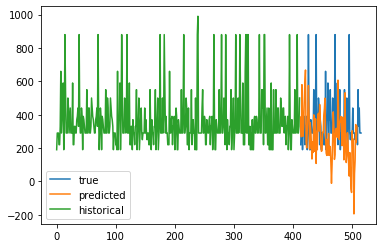

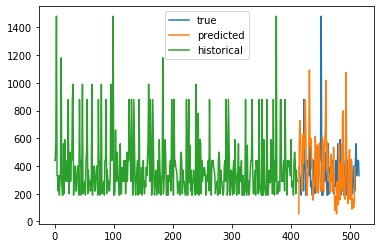

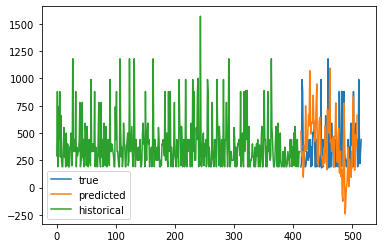

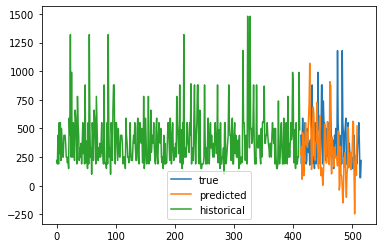

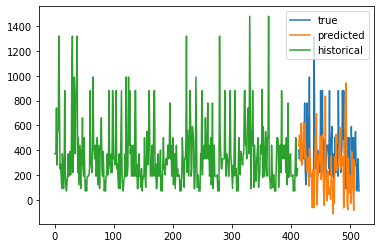

In [53]:
from tensorflow.keras.models import load_model

y_alls = []
for i in range(num_notes):
    
    # load model
    model = load_model("music_forecaster_{i}.h5")
    
    # load dataset
    dataset = pd.DataFrame(music_sheet[i])

    target_name = i
    calib_data, holdout_data = dataset[:int(len(dataset)*0.80)], dataset[-int(len(dataset)*0.20):]

    X_for_pred = get_X_for_pred(holdout_data, calib_data, target_name)
    
    x_holdout = holdout_data.index
    x_calib = calib_data.index

    y_holdout_preds = rolling_pred(model, X_for_pred, n_in, n_out, range_=30, target_name=target_name)
    y_holdout_true = holdout_data[target_name][:len(x_holdout)]
    y_calib = calib_data[target_name]

    plt.plot(x_holdout, y_holdout_true, label='true')
    plt.plot(x_holdout[:len(y_holdout_preds)], y_holdout_preds[:len(x_holdout)], label='predicted')
    plt.plot(x_calib, y_calib, label='historical'[-200:])

    plt.legend()
    plt.show()
    
    # concatenate historical and predicted
    y_all = list(y_calib.values) + y_holdout_preds
    y_alls.append(y_all)
    
y_alls = np.array(y_alls)

## Save model

In [54]:
# model.save("music_forecaster.h5")

## Convert Notes from Frequencies to Waves

In [55]:
y_alls.shape

(5, 508)

In [56]:
import numpy as np
from scipy.io import wavfile

comb_wavs = []
sampleRate = fs
length = 1

for j in range(num_notes):
    music_wavs = []
    for i in range(len(y_alls[j, :])):
        frequency = y_alls[j,:][i]

        t = np.linspace(0, length, sampleRate*length+1)  #  Produces a 1 second Audio-File
        y = np.sin(frequency * 2 * np.pi * t)[:len(t)//3]  #  Has frequency

        music_wavs += list(y)
    print(len(music_wavs))
    music_wavs = np.array(music_wavs)
    comb_wavs.append(music_wavs)

comb_wavs = np.sum(comb_wavs, axis=0)
wavfile.write('Sine_2.wav', sampleRate, comb_wavs)

7467600
7467600
7467600
7467600
7467600
